## Invoice PDF fields extraction

There are two types of pdf file considered here:
    - PDF generated by a system
    - PDF with scanned invoice


### Importing pdf without image and then converting to text

#### Method 1: Field extraction from a system generated pdf

In [1]:
# Method 1
import PyPDF2

f_name=open('C:/Users/ajay/Desktop/pdf_extract/8008279743_EDCAN0000798497.pdf','rb')
pdfreader=PyPDF2.PdfFileReader(f_name) # Reading file

n_pages = pdfreader.numPages # number of pages of this pdf fil

#create a variable that will select the selected number of pages
text_pg = []
for i in range(0,n_pages):
    pageobj = pdfreader.getPage(i)
    text = pageobj.extractText()    #create text variable which will store all text datafrom pdf file
    text = text + '\n' + '-------------------------------------------------------------------------------------------'
    text_pg.append(text)

pdf_text = '\n\n'.join(map(str, text_pg))
    
file1=open("C:/Users/ajay/Desktop/pdf_extract/8008279743_EDCAN0000798497_txt.txt","a")
file1.writelines(pdf_text)
print(pdf_text)

#### Method 2: Field extraction from scanned pdf:
For this type of pdf if we use method 1 it will give null output. So, method 2 is used and involves following steps
    - Convert pdf to image, it can be have multiple image based on number of images.
    - Once image we have then we will pass that to OCR (optical caracter recognization) model using pytesseract library. For additional details about OCR model https://github.com/UB-Mannheim/tesseract/wiki.
    - OCR model will convert whole image to text. Once text is genrated it can be pased into speeling check model which will basically correct spellings in text, later we can find required fields from text.
    - Another way is to look for specific keywords like 'Invoice No.' and then select the required text.
    
#### If any error realted to pytesseract and pdf2image:
pytesseract = Install tesseract.exe and provide path
pdf2image = Download poppler model form https://blog.alivate.com.au/poppler-windows/ and provide path.
    

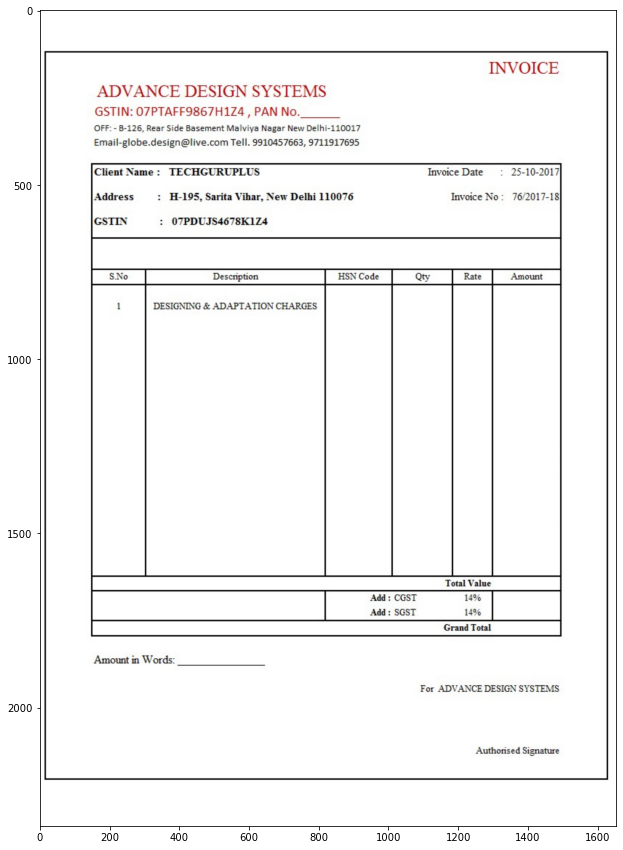

In [2]:
#%% Converting whole pdf to text file
import numpy as np
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
import cv2

#Tesseract Library
import pytesseract
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'

# Convert pdf to img
images = convert_from_path('C:/Users/ajay/Desktop/pdf_extract/bill_pdf.pdf',poppler_path=r'C:/Users/ajay/Downloads/poppler-0.68.0_x86/bin')

n_pages = len(images) # number of pages of this pdf fil

#create a variable that will select the selected number of pages
text_pg = []
for i in range(0,n_pages):
    text = pytesseract.image_to_string(images[i])  #create text variable which will store all text data from pdf file
    text = text + '\n' + '-------------------------------------------------------------------------------------------'
    text_pg.append(text)
pdf_text = '\n\n'.join(map(str, text_pg))
    
file_text=open(r"C:/Users/ajay/Desktop/pdf_extract/bill_pdf_text.txt","a")
file_text.writelines(pdf_text)

plt.rcParams['figure.figsize'] = [15, 15]
plt.imshow(images[0])

In [3]:
#%% Checking for spelling mistakes
from textblob import TextBlob

corrected_text=TextBlob(text).correct()
print(corrected_text)

ADVANCE DESIGN SYSTEMS
GSTIN: O7PTAFF9867H1Z4 , PAN To.

OFF: - B-126, Dear Side Casement Malviya Agar New Delhi-110017
Email-globe.design@live.com Well. 9910457663, 9711917695

Client Same : TECHGURUPLUS Voice Late =: 25-10-2017

Address : H-195, Maria Cigar, New Delhi 110076 Voice To: 76/2017-18

GSTIN : O7PDUJS4678K1Z4

| sCeeseription | sCeeseription

Total Value

14%
Grand Total

Amount in Words:

For ADVANCE DESIGN SYSTEMS

Authorized Signature

 

-------------------------------------------------------------------------------------------


In [4]:
# NLP library
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk  
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from wordcloud import WordCloud
import string
import plotly.graph_objs as go
from plotly import subplots
import plotly.offline as py

# Cleaning review data by eliminating stopwords, punctuation then returns the wordnet object value corresponding to the POS tag
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
#     # remove words that contain numbers
#     text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [5]:
corrected_text_1=clean_text(text)

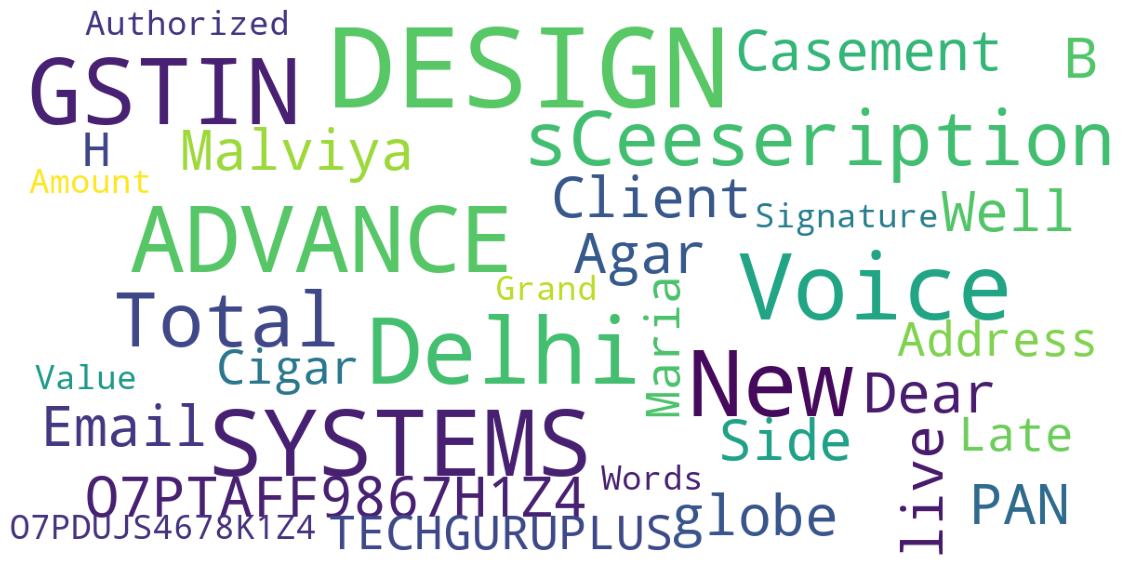

In [6]:
# wordcloud function
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(corrected_text)

In [7]:
# import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_list = word_tokenize(corrected_text_1)

In [8]:
text_list[:5]

['advance', 'design', 'systems', 'gstin', 'o7ptaff9867h1z4']

In [9]:
# Finding invoice is available in text data. Once found then selecting nearby text to build bounding box
invoice_list=[]
try:
    for i in range (len(text_list)):
        if text_list[i] == 'invoice':
            invoice_list.append(text_list[i+1])
            invoice_list.append(text_list[i+2])
            invoice_list.append(text_list[i+3])
            invoice_list.append(text_list[i+4])
except:
    print(i)
    

for i in invoice_list:
    if ((i.isnumeric() == True)):
        invoice_number = i
        print(invoice_number)

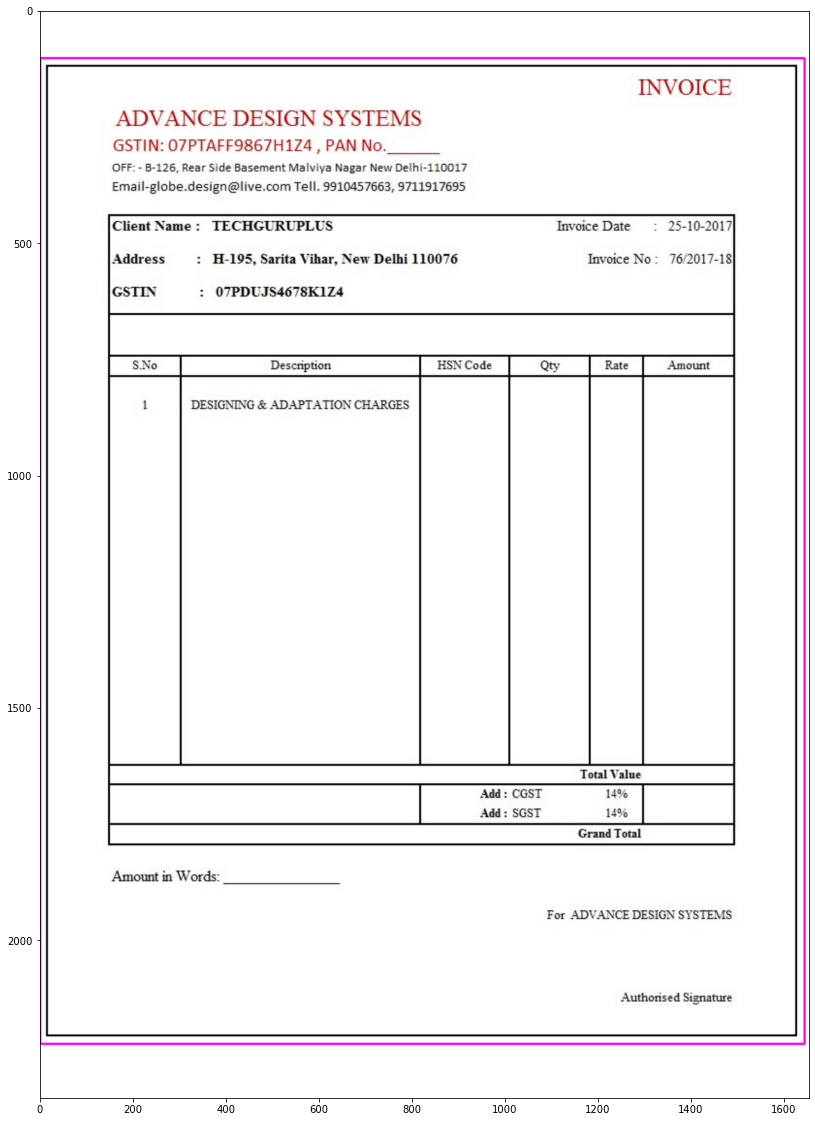

In [10]:
# Another way is to select required box area and then convert that into text 
def mark_region(image, n):
    image = np.array(image)

    # define threshold of regions to ignore
    THRESHOLD_REGION_IGNORE = n

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

    # Dilate to combine adjacent text contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    dilate = cv2.dilate(thresh, kernel, iterations=4)

    # Find contours, highlight text areas, and extract ROIs
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    line_items_coordinates = []
    for c in cnts:
        x, y, w, h = cv2.boundingRect(c)
        
        if w < THRESHOLD_REGION_IGNORE or h < THRESHOLD_REGION_IGNORE:
            continue
        
        image = cv2.rectangle(image, (x,y), (x+w, y+h), color=(255,0,255), thickness=3)
        line_items_coordinates.append([(x,y), (x+w, y+h)])

    return image, line_items_coordinates


image, line_items_coordinates = mark_region(images[0],100)
plt.figure(figsize=(20,20))
plt.imshow(image)


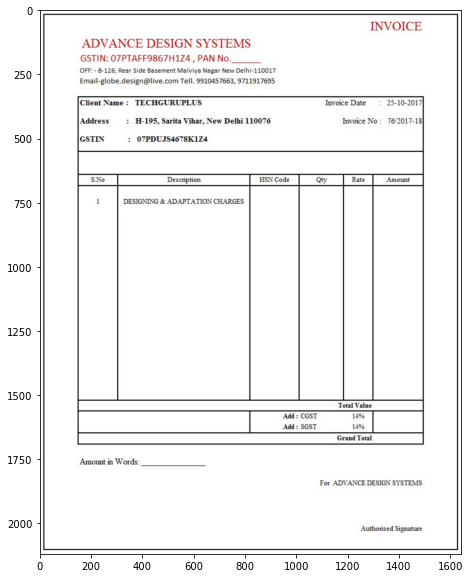

In [11]:
# Taking one box and extracting text out of it
image = np.array(images[0])
# get co-ordinates to crop the image
c = line_items_coordinates[0]

# cropping image img = image[y0:y1, x0:x1]
img = image[c[0][1]:c[1][1], c[0][0]:c[1][0]]    

plt.figure(figsize=(10,10))
plt.imshow(img)


In [12]:
# Required text
# convert the image to black and white for better OCR
ret,thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)

# pytesseract image to string to get results
text = str(pytesseract.image_to_string(thresh1, config='--psm 6'))
print(text)

INVOICE
ADVANCE DESIGN SYSTEMS
GSTIN: 07PTAFF9867H124 , PAN No.
OFF: - B-226, Rear S de Basement Maivya Nagar New Delhi-LiCC17
Email-globe.design @live.com Tell. 9910457663, 9711917695
Client Name : TECHGURUPLUS Invoice Date =. 25-10-2017
Address : H-198, Sarita Vihar, New Delhi 110076 Invoice No: 76 2017-18
GSTIN : O?TPDUIS4678K1Z4
Add: CGST 146
Add: SGST 1496
Amount in Words:
For ADVANCE DESIGN SYSTENS
Authorised Signature



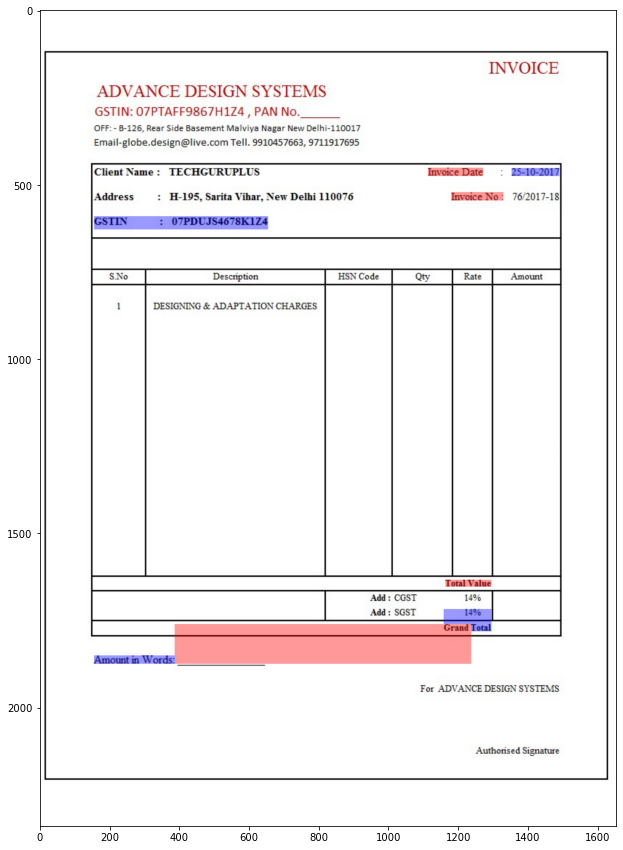

In [13]:
# Another way is to look for specific keyword in a scanned pdf
d= pytesseract.image_to_data(images[0], output_type=Output.DICT, lang='eng') 
n_boxes = len(d['level'])

overlay = np.array(images[0].copy())
for i in range(n_boxes):
    text = d['text'][i]
    try:
        if text == 'Invoice' or text == 'Total':
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            (x1, y1, w1, h1) = (d['left'][i + 1], d['top'][i + 1], d['width'][i + 1], d['height'][i + 1])
            (x2, y2, w2, h2) = (d['left'][i + 3], d['top'][i + 3], d['width'][i + 3], d['height'][i + 3])
            # cv2.rectangle(img, (x, y), (x1 + w1, y1 + h1), (0, 255, 0), 2)
            cv2.rectangle(overlay, (x, y), (x1 + w1, y1 + h1), (255, 0, 0), -1)
            # cv2.rectangle(img, (x2, y2), (x2 + w2, y2 + h2), (0, 255, 0), 2)
            cv2.rectangle(overlay, (x2, y2), (x2 + w2, y2 + h2), (0, 0, 255), -1)
            # print(text)
    except:
        print('Keyword not found')

alpha = 0.4  # Transparency factor.
img_new = cv2.addWeighted(overlay, alpha, np.array(images[0]), 1 - alpha, 0) # Overlays transparent rectangle over the image

plt.imshow(img_new)


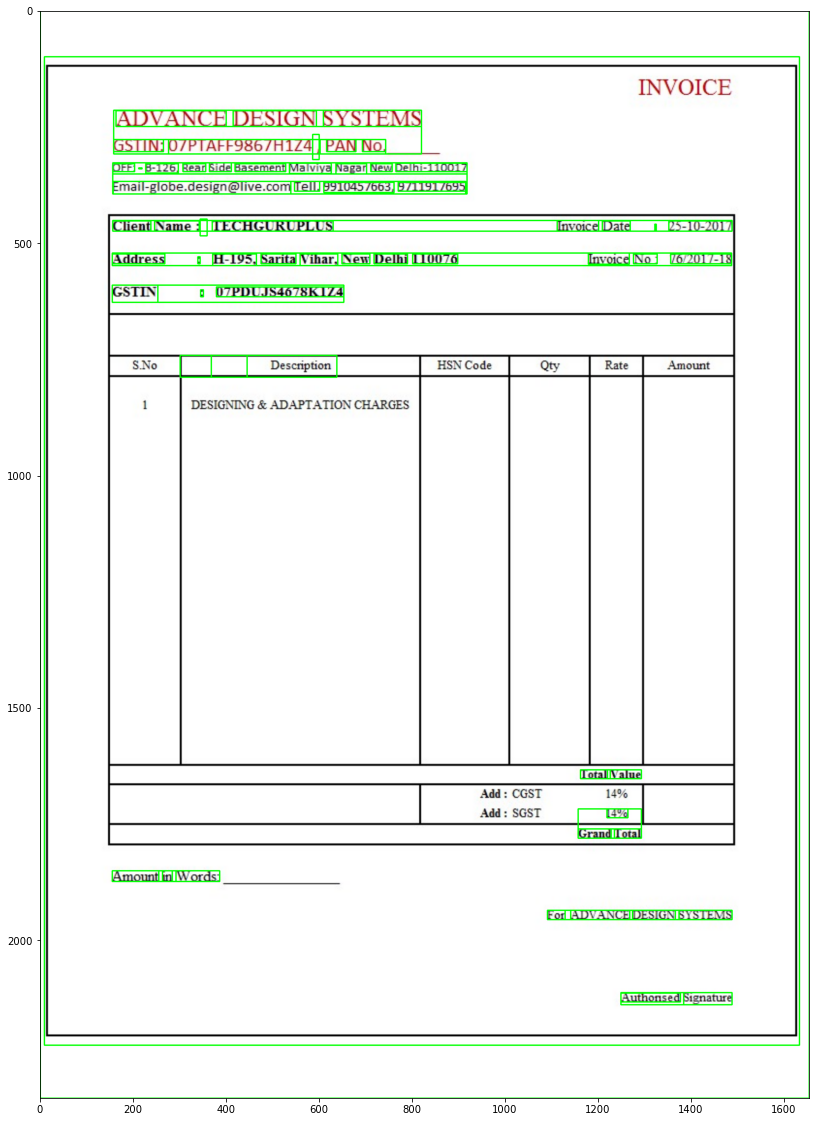

In [14]:
def plot_rgb(image):
    plt.figure(figsize=(20,20))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

image = np.array(images[0])
image_c= image.copy()
d = pytesseract.image_to_data(image_c, output_type=Output.DICT)
n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plot_rgb(boxes)